In [90]:
#@title Librerias

import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.integrate import quad, trapezoid, simpson, tplquad, fixed_quad # Integracón
from scipy.interpolate import CubicSpline, CubicHermiteSpline, interp1d, lagrange # Interpolación
from scipy.optimize import fsolve, root_scalar, newton # Raíces
from scipy.stats import linregress # Regresión
import sympy as sp # Simbólica

# Parcial I - Métodos Computacionales
**2024-2**

---

*Nombre:*

*Identificación:*

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub del curso y recuerde hacer pull-request

# 1

**(40 puntos)** La velocidad del agua $v$ [m/s] en la descarga de un tanque cilindrico a través de un tubo largo (como se muestra en la figura) se puede calcular como:

$$
v = \sqrt{2gH}\tanh{\left(\frac{\sqrt{2gH}}{2L}t\right)}
$$



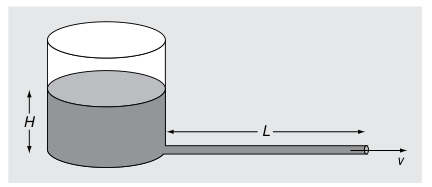

In [ ]:
g=9.81

#funcion explicita
def velocidad(g,H,L,t):
  v=np.sqrt(2*g*H)*np.tanh(np.sqrt(2*g*H)*t/2*L)
  return v

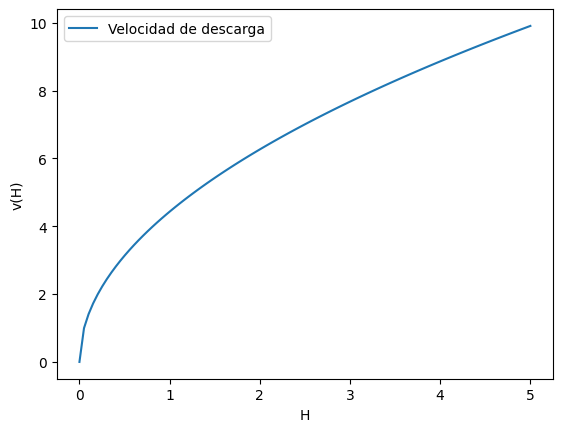

In [ ]:
#grafico de v

H_valores=np.linspace(0,5,100)

plt.plot(H_valores,velocidad(g,H_valores,4,2.5),label='Velocidad de descarga')
plt.xlabel('H')
plt.ylabel('v(H)')
plt.legend()
plt.show()

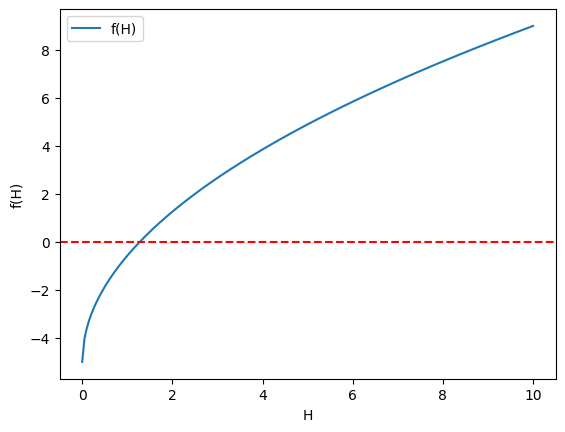

In [47]:
H = sp.symbols("H")
H_val= np.linspace(0 , 10, 200)
v_raiz= sp.sqrt(2*g*H)*sp.tanh(sp.sqrt((2*g*H)*2.5/2*4))- 5

#grafico de v

H_valores=np.linspace(0,5,100)


plt.plot(H_val, [v_raiz.subs(H, x) for x in H_val],label='f(H)')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('H')
plt.ylabel('f(H)')
plt.legend()
plt.show()

In [ ]:
#queremos encontrar la raiz de una funcion que con tiene a H para ciertos valores y asi resolver la ecuacion trascedental

#valores
v_d=5
t=2.5
L=4
H_valores_raiz=np.linspace(0,1.5,100)

def f_raiz(H):
  #valores
  v_d=5
  t=2.5
  L=4

  term_tanh=np.tanh(np.sqrt(2*g*H)*t)/(2*L)
  term_raiz=np.sqrt(2*g*H)
  term_final=v_d/(term_tanh*term_raiz)

  return term_final



#plt.plot(H_valores_raiz,f_raiz(H_valores_raiz),color='red',label='funcion')
#plt.legend()
#plt.show()

In [ ]:
def METODO_BISECCION(f, a, b, tol):
    while (b - a)/2 > tol:
        c = (a + b)/2

        if f(c) == 0 :
            return c

        elif f(a)*f(c) < 0:
            b = c
        else:
            a = c

    return (a + b)/2


In [ ]:
raiz_biseccion=METODO_BISECCION(f_raiz,1,2,1e-7)
raiz_biseccion


1.9999999403953552

donde $g$ = 9.81 m/s$^2$, H es la carga hidrostática inicial (m), L la longitud del tubo (m) y $t$ el tiempo transcurrido (s).

*a)* Escriba una función explicita para encontrar la velocidad de descarga en función de las variables asociadas.

*b)* Realice un gráfico de $v(H)$ para $0\leq H\leq 5$, con $L = 4$ m y para $t = 2.5$ s

*c)* Suponga que quiere conocer la carga hidrostática necesaria para tener una velocidad de 5 m/s transcurridos 2.5 s. Identifique gráficamente este valor.

*d)* Realice una función que encuentre la raiz usando el método de bisección con una tolerancia de 1e-7, para esto puede modificar el siguiente pseudo-código:


```python
MÉTODO BISECCIÓN(f, a, b, tol)
    MIENTRAS (b - a)/2 > tol HACER
        c = (a + b)/2
        
        SI f(c) = 0 ENTONCES
            RETORNAR c
        
        SI f(a)*f(c) < 0 ENTONCES
            b = c
        SINO
            a = c
        FIN SI
    FIN MIENTRAS
    
    RETORNAR (a + b)/2
FIN MÉTODO
```

*e)* Usando el método de `scipy.newton` encuentre el valor de la raiz

```python
# Método de Newton
root = newton(f, x0, fprime)  # fprime es la derivada
```

Compare sus respuestas con el numeral anterior y obtenga el error relativo.


In [48]:
f = lambda H: np.sqrt(2*g*H)*np.tanh(np.sqrt((2*g*H)*2.5/(2*4)))-5

In [51]:
root = newton(f, 1.7)
root

1.2926245938616001

In [ ]:
newton?


In [53]:
error=(root-1.999)/root
error

-0.5464660114721838

# 2

**(30 puntos)** Usualmente algunas reacciones quimicas siguen el siguiente modelo:

$$
\frac{dc}{dt} = -kc^n
$$

donde $c$ es la concentración, $t$ el tiempo, $k$ la tasa de la reacción y $n$ su orden. Usando los siguientes datos:



```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])
```


*a)* Conociendo que el método de diferencias finitas se puede escribir como:

###  Diferencias finitas hacia adelante:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}
$$

### Diferencias finitas hacia atrás:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h}
$$

### Diferencias finitas centradas:
Aproximación de segundo orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$

Escribe una función explicita que calcule $dc/dt$ usando el método de diferencias finitas a partir de los valores de $c$ y $t$, luego grafique en función de t. *Ayuda: No es necesario interpolar*

*b)* Compare el resultado anterior con `numpy.gradient`, se acercan?

*c)* Linealice la ecuación inicial (para esto puede usar log) y encuentre los valores correspondientes a $k$ y $n$



```python
# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)
```

*d)* Finalmente, usando los valores de $k$ y $n$ grafique $dc/dt$ y compare con los datos de la tabla. ¿Se comportan igual, determine el error máximo?




In [77]:
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])

In [ ]:
gradient=np.gradient(c,t)

In [64]:
#diferencias finitas

def dif_finit(t):
  dif_f=[]

  for i in range(len(c)):
    if i==0:
      dif_f.append((c[i+1]-c[i])/(t[i+1]-t[i]))

    elif  i == len(c)-1:
      dif_f.append((c[i]-c[i-1])/(t[i]-t[i-1]))

    else:
      dif_f.append((c[i+1]-c[i-1])/(t[i+1]-t[i-1]))

  return dif_f

In [65]:
print(dif_finit(t))

[-0.10400000000000001, -0.0885, -0.0625, -0.044, -0.031, -0.026000000000000002]


In [67]:
gradient= np.gradient(c,t)

In [71]:
error_d=gradient-dif_finit(t)
error_d

array([0., 0., 0., 0., 0., 0.])

No solo se acercan, son iguales

<ipython-input-86-fc2dfd422bd2>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


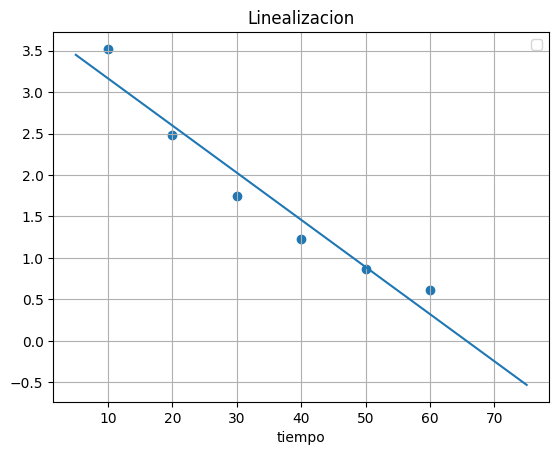

In [86]:
# Realizar el ajuste lineal
linealizacion=slope, intercept, r_value, p_value, std_err = linregress(t,c)
linealizacion_= lambda x: slope*x + intercept
t_graf= np.linspace(5,75,100)


plt.plot(t_graf, linealizacion_(t_graf))
plt.xlabel("tiempo")
plt.scatter(t, c)
plt.title("Linealizacion")
plt.legend()
plt.grid()
plt.show()

# 3
**(30 puntos)** Considere los  datos de concentración del punto anterior

```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])
```

*a)* Realice un gráfico de $c(t)$

*b)* Usando la interpolación de `scipy.interpolate.lagrange` y de `scipy.interpolate.CubicHermiteSpline` obtenga el polinomio interpolador de lagrange llamado `poly_lagrange` y de Hermite `poly_Hermite` para los datos datos.

*c)* Conociendo que `scipy.interpolate.lagrange` devuelve un array tipo Polynomial, use la siguiente rutina para encontrar la derivada:

``` python
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
```

Luego, grafique $dc/dt$ en función del tiempo $t$ y compare con la función
$$
\frac{dc}{dt} = -kc^n
$$

con $k = 3$ y $n = -2$

*d)* Realice un gráfico del error absoluto




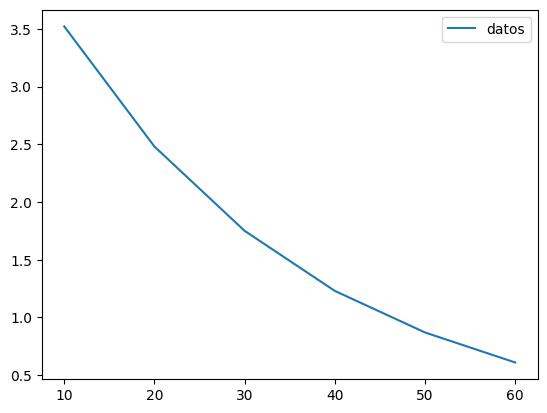

In [88]:
#grafico
plt.plot(t,c, label='datos')
plt.legend()


In [100]:
poly_lagrange = lagrange(t,c)
poly_Hermite = CubicHermiteSpline(t,c,gradient)

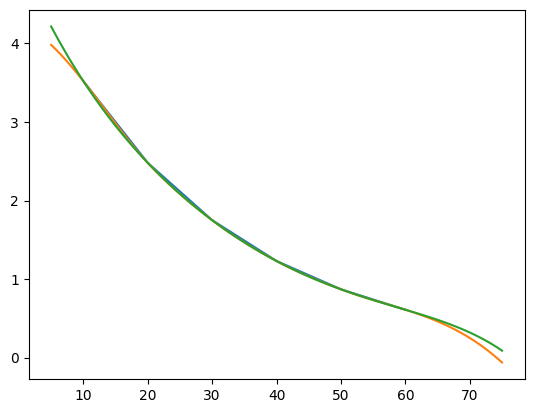

In [101]:
plt.plot(t, c)
plt.plot(t_graf,poly_Hermite(t_graf))
plt.plot(t_graf,poly_lagrange(t_graf))

In [103]:
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
derivative

Polynomial([-1.92950000e-01,  8.80833333e-03, -2.40000000e-04,  3.83333333e-06,
       -2.50000000e-08], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')